This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [151]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats 

In [152]:
df=pd.read_csv('diab.csv')

In [153]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [154]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [156]:
df.shape

(768, 9)

In [157]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [158]:
df['Outcome'].value_counts()   # The number of non-diabetic is 268 the number of diabetic patients is 500

0    500
1    268
Name: Outcome, dtype: int64

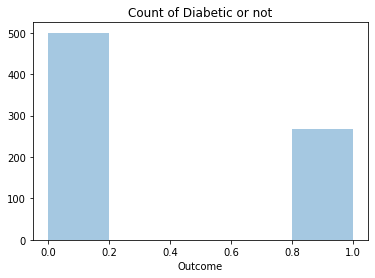

In [159]:
sns.distplot(df['Outcome'],kde=False)
plt.title("Count of Diabetic or not")
plt.show()   # 0 shows no diabetics and 1 shows diabetics

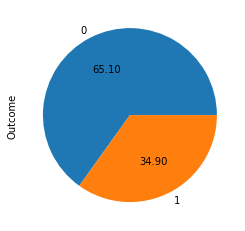

In [160]:
df['Outcome'].value_counts().plot(kind='pie',autopct='%1.2f')

#Missing values replacing 0 with np.nan

In [161]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]= df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0 , np.NaN)

In [162]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


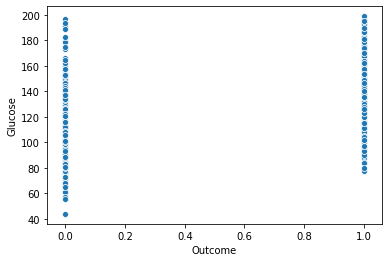

In [163]:
sns.scatterplot(df['Outcome'],df['Glucose'])
plt.show()

# it infers Glucose with high also doesnt have diabetes problem.

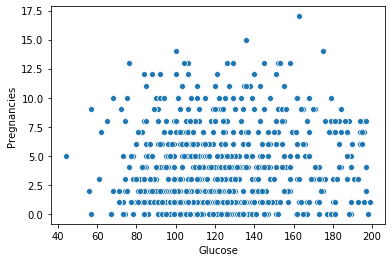

In [164]:
sns.scatterplot(df['Glucose'],df['Pregnancies'])
plt.show()

C:\Users\Neha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Neha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


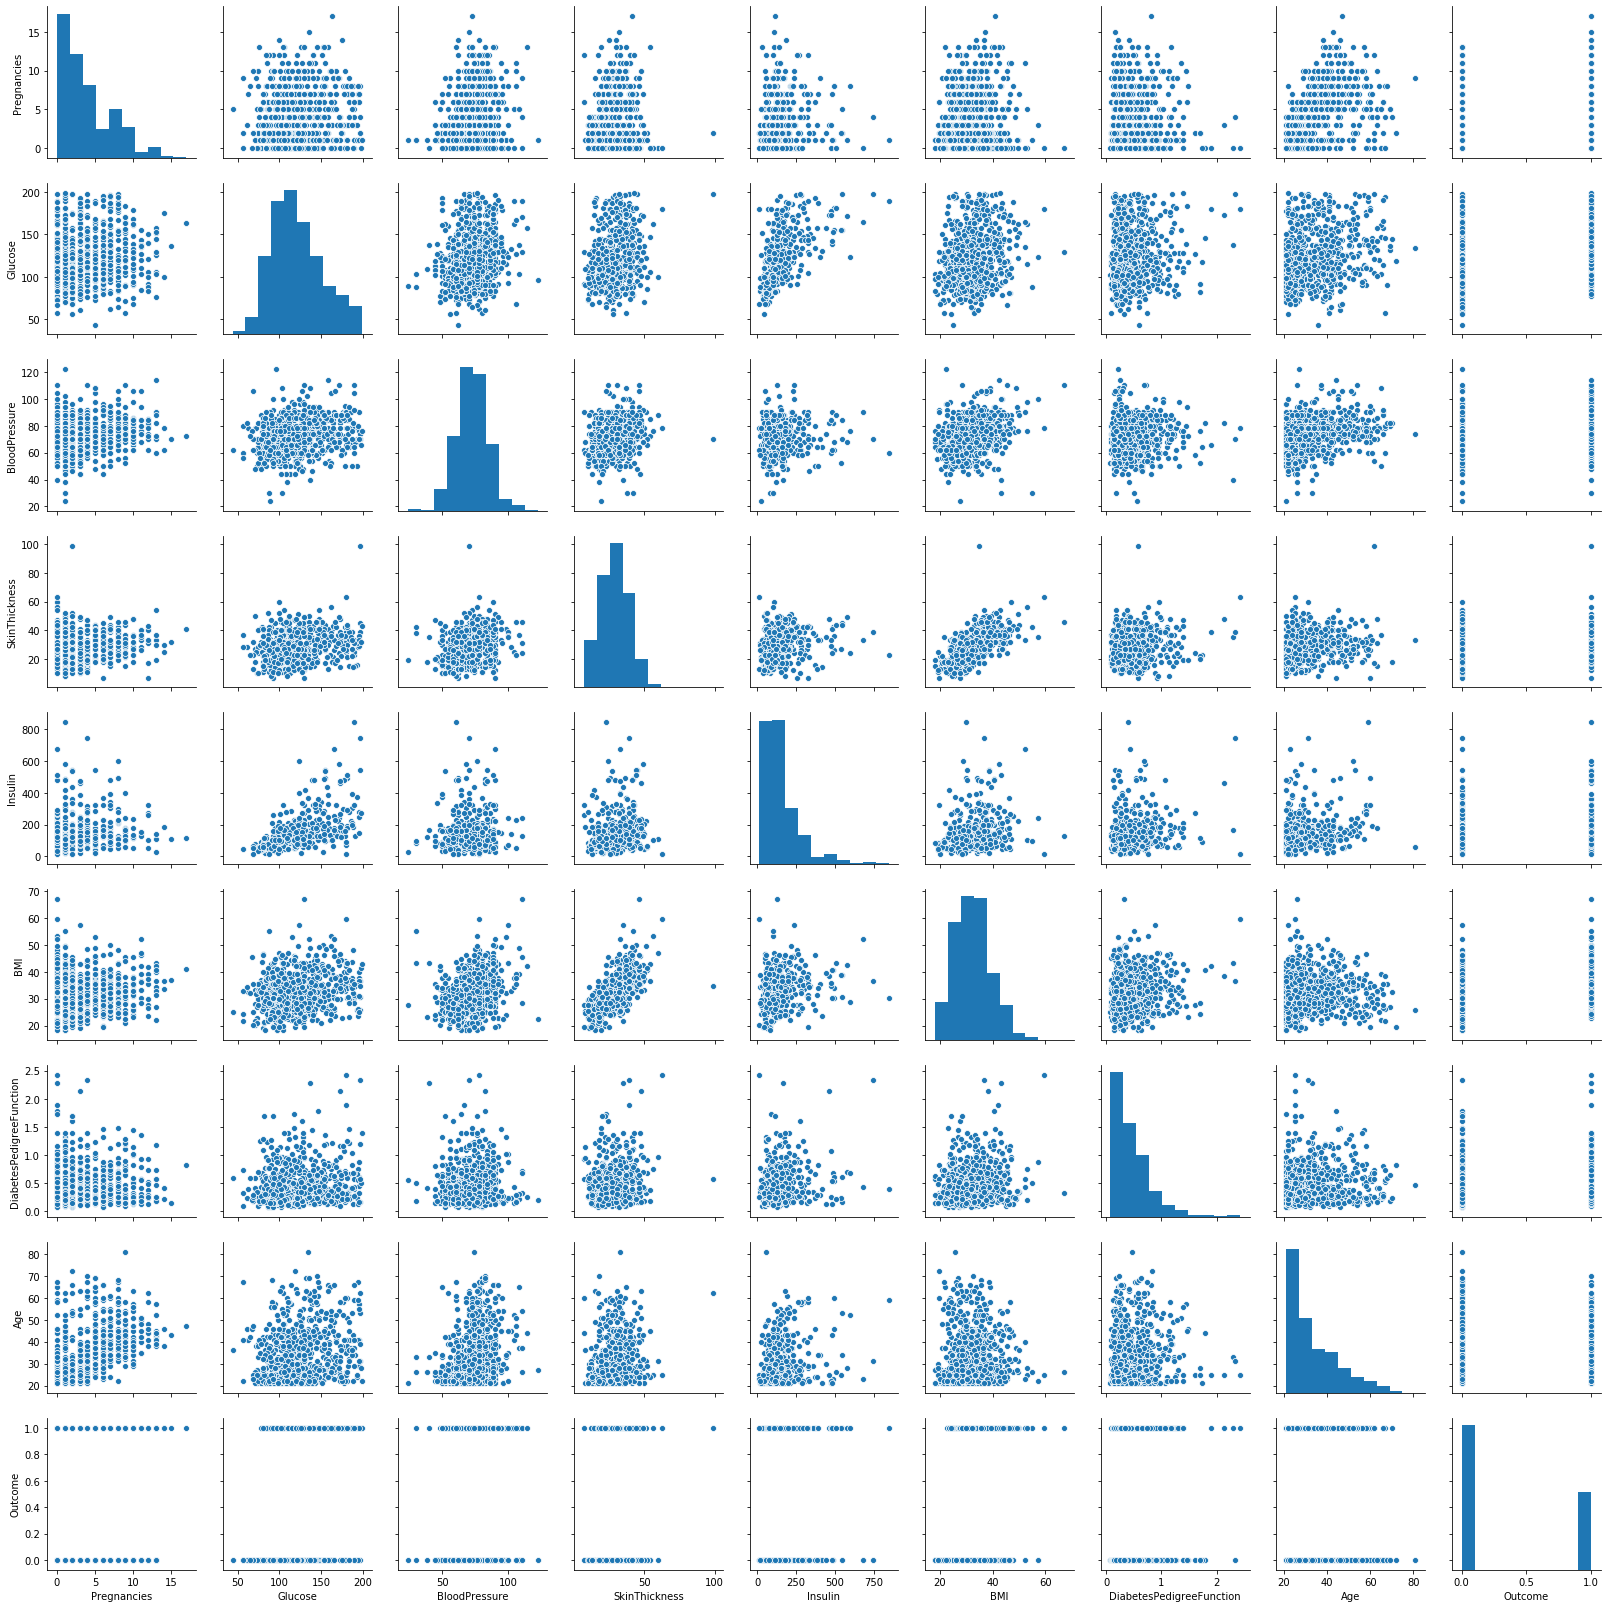

In [165]:
sns.pairplot(df)

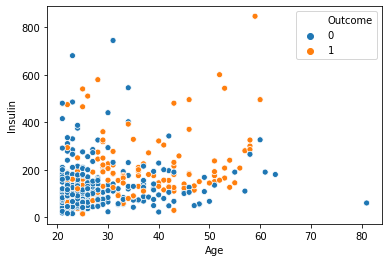

In [166]:
sns.scatterplot(df['Age'],df['Insulin'],hue=df['Outcome'])

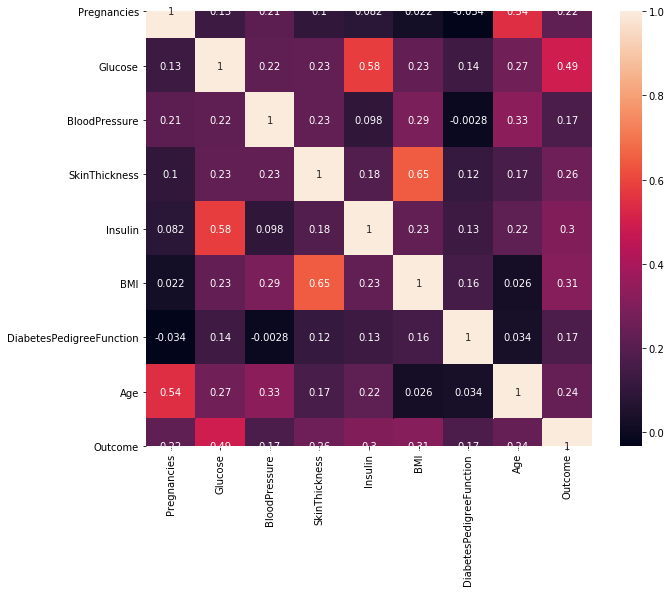

In [167]:
fig,axes=plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

#skinthickness and BMI has gud corr()

So as we can see above there are correlation between few columns. Age is highly correlated with Pregnancies. Insulin is highly correlated with skinthickness. Also skinthickness is correlated with BMI.

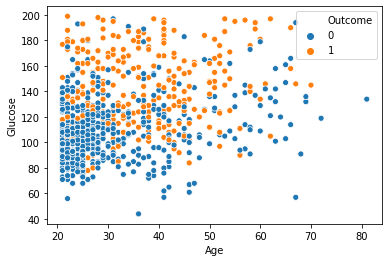

In [168]:
sns.scatterplot(x=df['Age'],y=df['Glucose'],hue=df['Outcome'])
plt.show()

#Generally with high glucose there are more number of people who have diabetes.

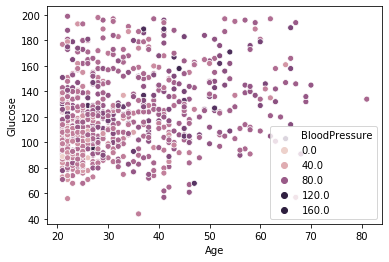

In [169]:
sns.scatterplot(x=df['Age'],y=df['Glucose'],hue=df['BloodPressure'])
plt.show()

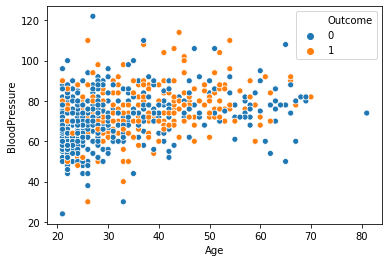

In [170]:
sns.scatterplot(x=df['Age'],y=df['BloodPressure'],hue=df['Outcome'])
plt.show()

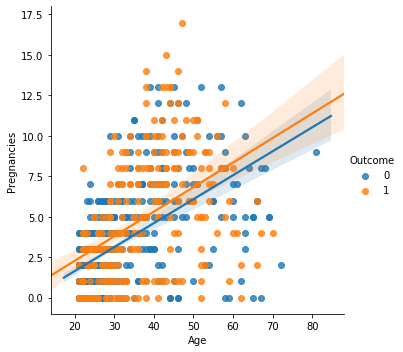

In [171]:
sns.lmplot(x='Age',y='Pregnancies',hue='Outcome',data=df)

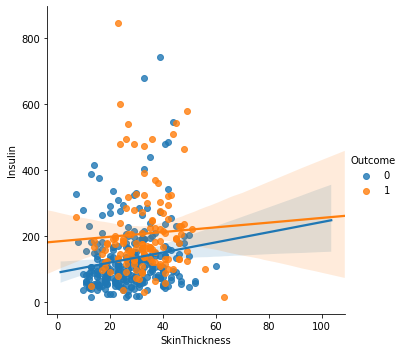

In [172]:
sns.lmplot(x='SkinThickness',y='Insulin',hue='Outcome',data=df)

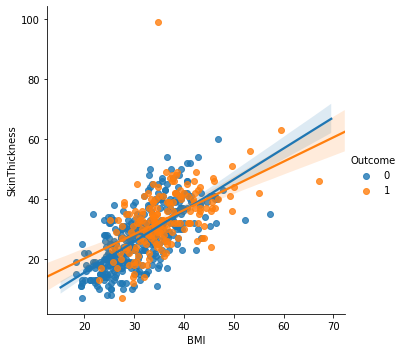

In [173]:
sns.lmplot(x='BMI',y='SkinThickness',hue='Outcome',data=df)

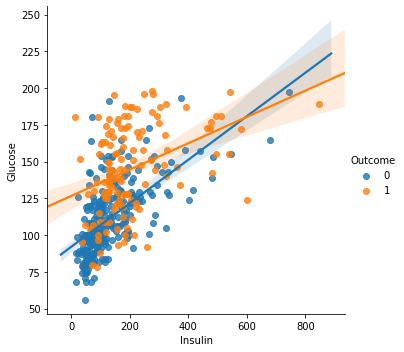

In [174]:
sns.lmplot(x='Insulin',y='Glucose',hue='Outcome',data=df)

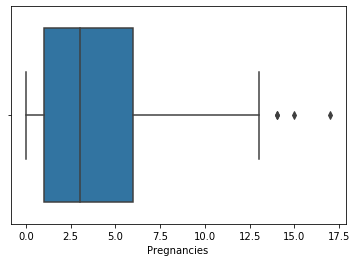

In [175]:
sns.boxplot(df['Pregnancies'])

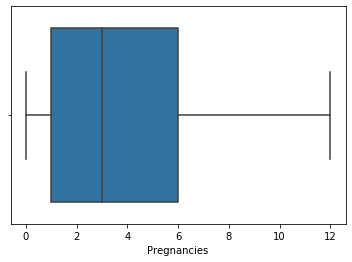

In [176]:
df['Pregnancies']=df.drop(df[df['Pregnancies'] >12].index)
sns.boxplot(df['Pregnancies'])

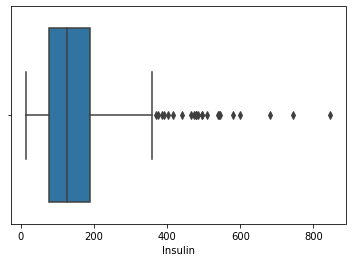

In [177]:
sns.boxplot(df['Insulin'])

In [182]:
df['Insulin']=df.drop(df[df['Insulin'] >600].index)

In [183]:
df['Insulin'].astype(float)

0       6.0
1       1.0
2       8.0
3       1.0
4       0.0
       ... 
763    10.0
764     2.0
765     5.0
766     1.0
767     1.0
Name: Insulin, Length: 768, dtype: float64

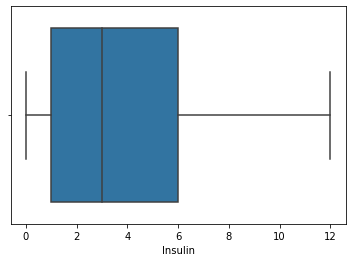

In [184]:
sns.boxplot(df['Insulin'])
plt.show()

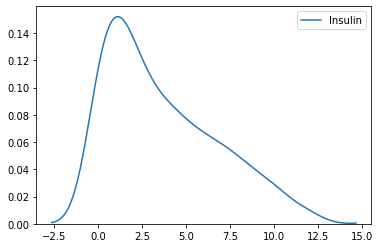

In [186]:
sns.kdeplot(df['Insulin'])

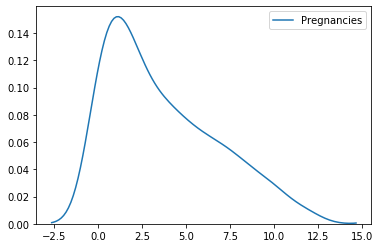

In [191]:
sns.kdeplot(df['Pregnancies'])
